# Lab 3: Gesture Recognition using Convolutional Neural Networks

**Deadlines**: 

- Lab 3 Part A: October 6, 11:59pm
- Lab 3 Part B: October 13, 11:59pm

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**TA**: Geoff Donoghue

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

With Colab, you can export a PDF file using the menu option
`File -> Print` and save as PDF file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1vBnIoS60xyozDRcOX5868mXIyAKqwGMp

## Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Ask your friend to take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early. In particular, the earlier questions can be completed even if you
do not yet have the full data set.

In [0]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, models, transforms

import gc
gc.collect()

from matplotlib import pyplot as plt 
%matplotlib inline

### 1. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

### I modeled my CNN class after AlexNet's archietecture. In particular, AlexNet's pattern of hidden units. AlexNet's convolutional model starts with a low amount of units, which increases, then decreases again at the output. Hence, the first convolution has a large 10x10 kernel, then up to 256 units of 3x3 kernels, then down to just 32 units.

### A pooling layer is also added to reduce the size of the inputs, hence reducing the number of parameters to trrain.

In [0]:
class CNN(nn.Module):

  def __init__(self):
    
    super(CNN, self).__init__()
    self.name = "cnn"
    
    # Convolutions
    self.conv1 = nn.Conv2d(3, 64, 10)
    self.conv2 = nn.Conv2d(64, 256, 5)
    self.conv3 = nn.Conv2d(256, 32, 3)    
    self.pool = nn.MaxPool2d(3, 2)
    
    # Fully-connected
    self.fc1 = nn.Linear(32*11*11, 64)
    self.fc2 = nn.Linear(64, 9)
  
  def forward(self, x):

    # CNN    
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))    
    x = self.pool(F.relu(self.conv3(x))) 
    x = self.pool(x)
    
    # Classifier
    x = x.view(-1, 32*11*11)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = x.squeeze(1) # Flatten to [batch_size]

    return x

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

### The CrossEntroyLoss loss function is used as it is strong in multi-class classification.

### The optimizer used is SGD over regular gradient descent as it tends to find a global optimium instead of a local one

In [0]:
def get_accuracy(model, data, use_cuda):
  
    data_loader = torch.utils.data.DataLoader(data, batch_size=32, shuffle=True, num_workers=0)

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]

    return correct / total

def train(model, train_data, val_data, batch_size=20, learning_rate=0.01, momentum=0.9, num_epochs=1, use_cuda = True):

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    iters, losses, train_acc, val_acc = [], [], [], []
    
    q, half, threeq = True, True, True
    
    print('Training...')

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_data, use_cuda)) # compute training accuracy 
            val_acc.append(get_accuracy(model, val_data, use_cuda))  # compute validation accuracy
            n += 1
        
#         print('Epoch', epoch+1)
    
        if q and (epoch+1) > 0.25 * num_epochs:
          print('Quarter way done')
          q = False
        if half and 0.5 * num_epochs < (epoch+1) < 0.75 * num_epochs:
          print('Halfway done')
          half = False
        if threeq and 0.75 * num_epochs < (epoch+1):
          print('3/4 done')
          threeq = False     
          

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

Training...
Quarter way done
Halfway done
3/4 done


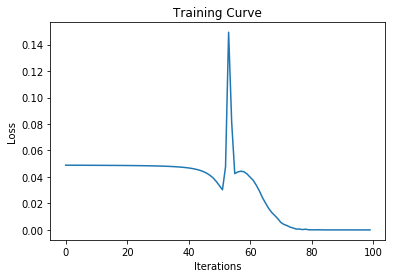

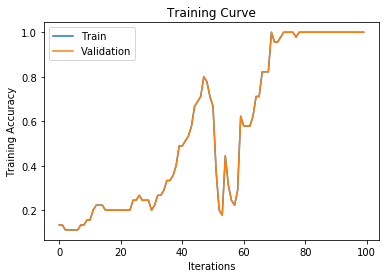

Final Training Accuracy: 1.0
Final Validation Accuracy: 1.0


In [0]:
##### Get small training data #####
small_dir_path = '/content/drive/My Drive/UofT/4th year/360/Lab 3b/Lab_3b_Gesture_Dataset - Copy/'
small_train_data = datasets.ImageFolder(small_dir_path, transform=transforms.ToTensor())

##### Train #####
model = CNN()
use_cuda = True
if use_cuda: model.cuda()
train(model, small_train_data, small_train_data, batch_size=len(small_train_data), num_epochs=100, use_cuda=use_cuda)

### 2. Data Loading and Splitting [5 pt]

Download the anonymized data collected by you and your classmates. Split the data into training, validation,
and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) For this portion only, you are free to look up tutorials or other code on the internet to help you.

### I chose 60/20/20 train/val/test split. The code is shown below

### Make dirs

In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import os

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
# Split
train_split, val_split, test_split = 0.6, 0.2, 0.2

dataset_root_dir = '/content/drive/My Drive/UofT/4th year/360/Lab 3b/Lab_3b_Gesture_Dataset'

try:
  os.mkdir(dataset_root_dir + '/train')
  os.mkdir(dataset_root_dir + '/test')
  os.mkdir(dataset_root_dir + '/val')
except:
  pass

os.listdir(dataset_root_dir)

['train', 'val', 'test']

### Split files into train,test,val folders

In [0]:
from shutil import copyfile

for class_name in classes:
  class_path = dataset_root_dir + '/' + class_name
  imgs = os.listdir(class_path)
  
  train_imgs = imgs[:int(train_split * len(imgs))]
  test_imgs = imgs[int(train_split * len(imgs)):int((test_split+train_split) * len(imgs))]
  val_imgs = imgs[int((test_split+train_split) * len(imgs)):]  
  
  folders = {
      'train' : train_imgs,
      'test' : test_imgs,
      'val' : val_imgs
  }
  
  for folder, folder_imgs in folders.items():
#     if not os.path.isdir(dataset_root_dir+'/'+folder+'/'+class_name):
#       os.mkdir(dataset_root_dir+'/'+folder+'/'+class_name)
    
    for img in folder_imgs:
      src_img_path = class_path+'/'+img
      dest_img_path = dataset_root_dir +'/'+folder+'/'+class_name+'/'+img
      print('src', src_img_path)
      print('dst', dest_img_path)
      copyfile(src_img_path, dest_img_path)
      
  print(class_name)

In [0]:
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(dataset_root_dir+'/train', transform=data_transform)
test_data = datasets.ImageFolder(dataset_root_dir+'/test/', transform=data_transform)
val_data = datasets.ImageFolder(dataset_root_dir+'/val', transform=data_transform)

### 3. Training [5 pt]

Train your first network on your training set. Plot the training curve, and include your plot in your writeup.
Make sure that you are checkpointing frequently!

In [0]:
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error.

    Args:
        path: The base path of the csv files produced during training
    """
    
    train_acc = np.loadtxt("{}_train_acc.csv".format(path))
    val_acc = np.loadtxt("{}_val_acc.csv".format(path))
    losses = np.loadtxt("{}_train_loss.csv".format(path))
    
    plt.title("Train vs Validation Accuracy")
    n = len(train_acc) # number of epochs
    plt.plot(range(1,n+1), train_acc, label="Train")
    plt.plot(range(1,n+1), val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    
    plt.title("Training Loss Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [0]:
import time

def train(model, train_data, val_data, batch_size=20, learning_rate=0.01, momentum=0.9, num_epochs=1, weight_decay=0, use_cuda = True):
  
    if torch.cuda.is_available():
      torch.cuda.empty_cache()
  
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
     
    # Load data
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
    
    # Initialize parameters
    iters, train_acc, val_acc, losses = [], [], [], []
    q, half, threeq = True, True, True
    start_time = time.time()
    n = 0 # the number of iterations
    
    # Begin training
    print('Training...')
    for epoch in range(num_epochs):
        gc.collect()
        epoch_losses = []
        for imgs, labels in iter(train_loader):
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            epoch_losses.append(float(loss)/batch_size)             # compute *average* loss
            n += 1
            if torch.cuda.is_available():
              torch.cuda.empty_cache()
            
        # Stats
        gc.collect()
        train_acc.append(get_accuracy(model, train_data, use_cuda)) # compute training accuracy 
        val_acc.append(get_accuracy(model, val_data, use_cuda))  # compute validation accuracy
        losses.append(sum(epoch_losses) / len(epoch_losses)) # compute *average* epoch loss
            
        # Progress
#         print('Epoch', epoch, 'Train acc', train_acc[-1], 'Val acc', val_acc[-1])
        if q and (epoch+1) > 0.25 * num_epochs:
          print('Quarter way done - Epoch', epoch)
          print('Train acc', train_acc[-1], 'Val acc', val_acc[-1])
          q = False
        if half and 0.5 * num_epochs < (epoch+1) < 0.75 * num_epochs:
          print('Halfway done - Epoch', epoch)
          print('Train acc', train_acc[-1], 'Val acc', val_acc[-1])
          half = False
        if threeq and 0.75 * num_epochs < (epoch+1):
          print('3/4 done - Epoch', epoch)
          print('Train acc', train_acc[-1], 'Val acc', val_acc[-1])
          threeq = False  
        
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
          

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Write the train/test loss/err into CSV file for plotting later
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), losses)
    np.savetxt("{}_val_acc.csv".format(model_path), val_acc)

    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    
    plot_training_curve(model_path)

### First training

Training...
Quarter way done - Epoch 7
Train acc 0.24275862068965517 Val acc 0.22040816326530613
Halfway done - Epoch 15
Train acc 0.4296551724137931 Val acc 0.42653061224489797
3/4 done - Epoch 22
Train acc 0.5027586206896552 Val acc 0.4530612244897959
Total time elapsed: 1304.79 seconds
Final Training Accuracy: 0.5627586206896552
Final Validation Accuracy: 0.5755102040816327


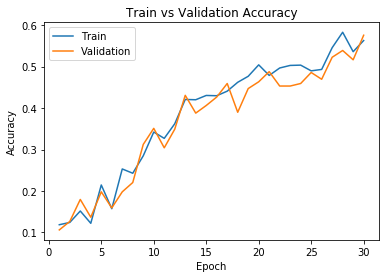

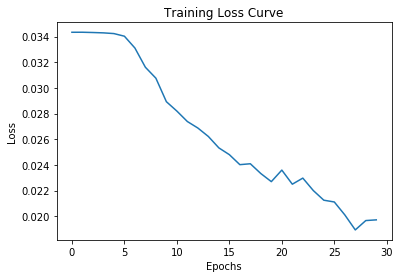

In [0]:
model = CNN()
use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, num_epochs=30, use_cuda=use_cuda)

### 4. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

- Hidden units / channels
- Learning rate
- Epochs

### Part (b) - 6 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

### Reduced channels

In [0]:
class CNN_2(nn.Module):

  def __init__(self):
    
    super(CNN_2, self).__init__()
    self.name = "cnn_2"
      
    self.conv1 = nn.Conv2d(3, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 16, 3)    
    self.pool = nn.MaxPool2d(2, 2)
    
    self.fc1 = nn.Linear(16*25*25, 64)
    self.fc2 = nn.Linear(64, 9)
  
  def forward(self, x):
    
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))    
    x = self.pool(F.relu(self.conv3(x))) 

    x = x.view(-1, 16*25*25)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = x.squeeze(1) # Flatten to [batch_size]

    return x

Training...
Quarter way done - Epoch 7
Train acc 0.346180316586373 Val acc 0.35714285714285715
Halfway done - Epoch 15
Train acc 0.4631796283551273 Val acc 0.45918367346938777
3/4 done - Epoch 22
Train acc 0.4425326909841707 Val acc 0.42448979591836733
Total time elapsed: 562.65 seconds
Final Training Accuracy: 0.5209910529938059
Final Validation Accuracy: 0.4897959183673469


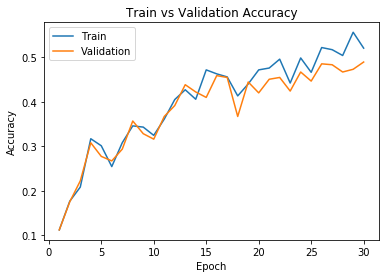

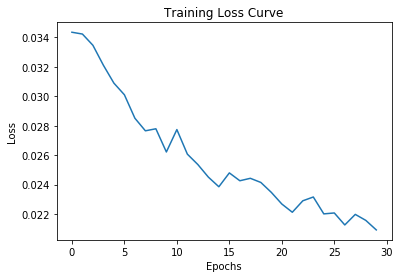

In [0]:
#conv2 = 64
model = CNN_2()
use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, learning_rate=0.01, num_epochs=30, use_cuda=use_cuda)

### Increase channels

In [0]:
class CNN_3(nn.Module):

  def __init__(self):
    
    super(CNN_3, self).__init__()
    self.name = "cnn_3"
      
    self.conv1 = nn.Conv2d(3, 112, 10)
    self.conv2 = nn.Conv2d(112, 424, 5)
    self.conv3 = nn.Conv2d(424, 32, 3)    
    self.pool = nn.MaxPool2d(3, 2)
    
    self.fc1 = nn.Linear(32*11*11, 64)
    self.fc2 = nn.Linear(64, 9)
  
  def forward(self, x):
    
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))    
    x = self.pool(F.relu(self.conv3(x))) 
    x = self.pool(x)
    
    
    x = x.view(-1, 32*11*11)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = x.squeeze(1) # Flatten to [batch_size]

    return x

Training...
Quarter way done - Epoch 7
Train acc 0.21862068965517242 Val acc 0.21836734693877552
Halfway done - Epoch 15
Train acc 0.41793103448275865 Val acc 0.42244897959183675
3/4 done - Epoch 22
Train acc 0.506896551724138 Val acc 0.49183673469387756
Total time elapsed: 2603.79 seconds
Final Training Accuracy: 0.5868965517241379
Final Validation Accuracy: 0.5346938775510204


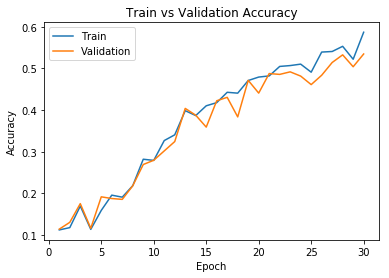

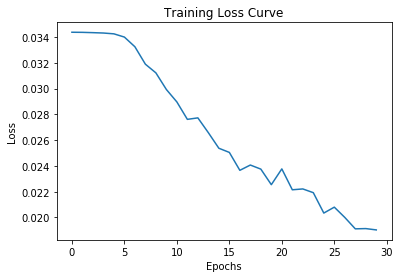

In [0]:
model = CNN_3()
use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, learning_rate=0.01, num_epochs=30, use_cuda=use_cuda)

### Increasing or reducing channels both had adverse affects, so keeping original CNN() model.

## Increase lr

Training...
Quarter way done - Epoch 7
Train acc 0.11218169304886441 Val acc 0.11224489795918367
Halfway done - Epoch 15
Train acc 0.11149346180316587 Val acc 0.11224489795918367
3/4 done - Epoch 22
Train acc 0.11424638678596008 Val acc 0.11428571428571428
Total time elapsed: 496.56 seconds
Final Training Accuracy: 0.11218169304886441
Final Validation Accuracy: 0.11224489795918367


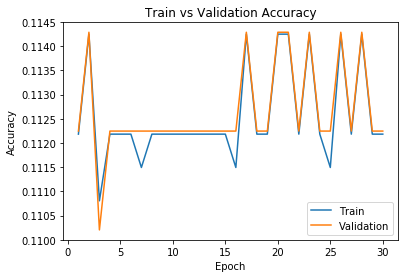

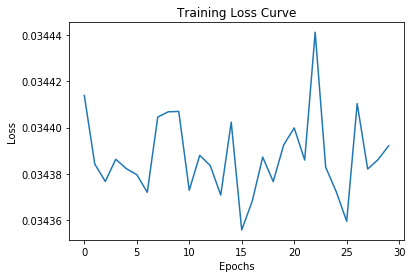

In [0]:
model = CNN()
use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, learning_rate=0.1, num_epochs=30, use_cuda=use_cuda)

### Make the increase only by 60% instead of 10x

Training...
Quarter way done - Epoch 7
Train acc 0.2889655172413793 Val acc 0.2714285714285714
Halfway done - Epoch 15
Train acc 0.4696551724137931 Val acc 0.4816326530612245
3/4 done - Epoch 22
Train acc 0.5675862068965517 Val acc 0.5755102040816327
Total time elapsed: 1308.55 seconds
Final Training Accuracy: 0.6006896551724138
Final Validation Accuracy: 0.5714285714285714


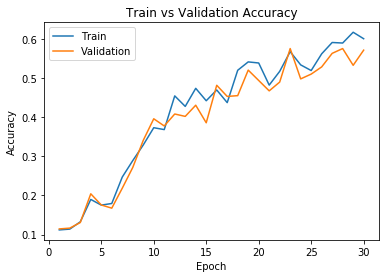

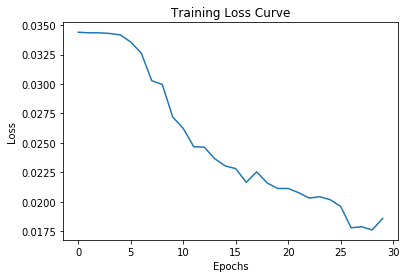

In [0]:
model = CNN()
use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, learning_rate=0.0167, num_epochs=30, use_cuda=use_cuda)

### LR increase ineffective,
### Go back to model with more channels and increase epochs

Training...
Quarter way done - Epoch 12
Train acc 0.3882758620689655 Val acc 0.3489795918367347
Halfway done - Epoch 25
Train acc 0.5124137931034483 Val acc 0.48367346938775513
3/4 done - Epoch 37
Train acc 0.66 Val acc 0.6469387755102041
Total time elapsed: 2188.27 seconds
Final Training Accuracy: 0.6406896551724138
Final Validation Accuracy: 0.6408163265306123


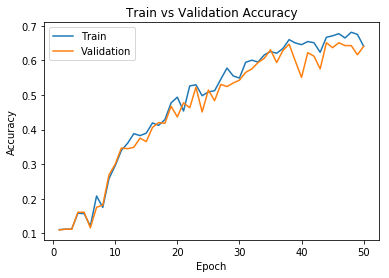

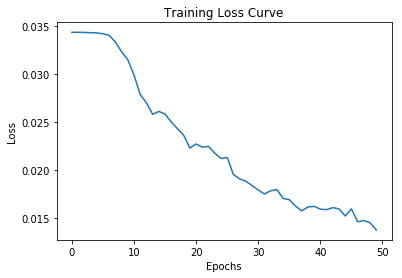

In [0]:
model = CNN()
use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, learning_rate=0.01, num_epochs=50, use_cuda=use_cuda)

### Epochs=60

Training...
Quarter way done - Epoch 2
Train acc 0.6806896551724138 Val acc 0.6653061224489796
Halfway done - Epoch 5
Train acc 0.7020689655172414 Val acc 0.6755102040816326
3/4 done - Epoch 7
Train acc 0.6641379310344827 Val acc 0.6530612244897959
Total time elapsed: 427.15 seconds
Final Training Accuracy: 0.7027586206896552
Final Validation Accuracy: 0.7


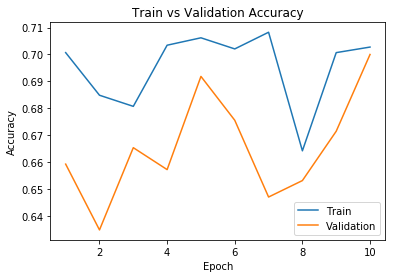

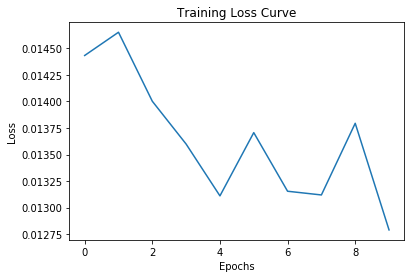

In [0]:
model = CNN()
checkpoint = torch.load(get_model_name("cnn", 64, 0.01, 49))
model.load_state_dict(checkpoint)
model.name="cnn_from_e49"

use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, learning_rate=0.01, num_epochs=10, use_cuda=use_cuda)

### Epochs = 70

Training...
Quarter way done - Epoch 2
Train acc 0.7055172413793104 Val acc 0.6653061224489796
Halfway done - Epoch 5
Train acc 0.7055172413793104 Val acc 0.7306122448979592
3/4 done - Epoch 7
Train acc 0.6793103448275862 Val acc 0.6632653061224489
Total time elapsed: 425.78 seconds
Final Training Accuracy: 0.6765517241379311
Final Validation Accuracy: 0.6551020408163265


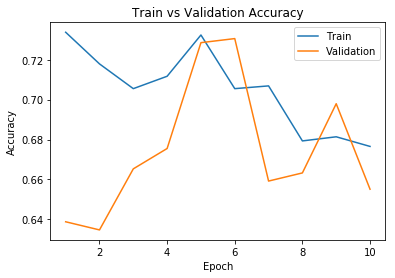

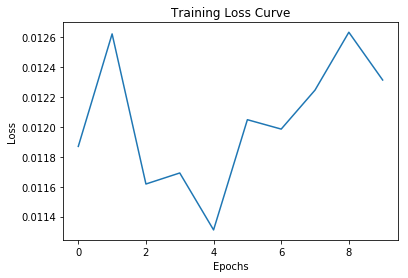

In [0]:
model = CNN()
checkpoint = torch.load(get_model_name("cnn_from_e49", 64, 0.01, 9))
model.load_state_dict(checkpoint)
model.name="cnn_from_e59"

use_cuda = True
if use_cuda: model.cuda()
train(model, train_data, val_data, batch_size=64, learning_rate=0.01, num_epochs=10, use_cuda=use_cuda)

### Part (c) - 1 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

### The best model is chosen because of the highest accuracy achieved on the validation set

In [0]:
model = CNN()
checkpoint = torch.load(get_model_name("cnn_from_e59", 64, 0.01, 4))
model.load_state_dict(checkpoint)
model.name="cnn_best"

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once.

In [0]:
model.cuda()
best_acc = get_accuracy(model, test_data, True)
best_acc

0.702258726899384

### 5. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [9]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:02<00:00, 105MB/s]


The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [10]:
# Save features into a dict 

features = {'test':[], 'val':[], 'train':[]}
for data_type, data in {'train':train_data, 'test':test_data, 'val':val_data}.items():
  print(data_type)
  loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True, num_workers=8)
  for img,label in loader:
    feature = alexnet.features(img)
    features[data_type].append({
        label : feature.squeeze(1)
    })

train
test
val


**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [0]:
# Save dict locally
import pickle
pickle.dump(features, open('alex_net_features.pickle','wb'))

In [0]:
f=open('alex_net_features.pickle','rb')
loaded_features=pickle.load(f)

In [13]:
# Test call
loaded_features['train'][0]

{tensor([8]): tensor([[[[3.9816e-01, 3.9816e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [3.9816e-01, 3.9816e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00]],
 
          [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00],
           [0.

In [0]:
# Load features into a class accessible by pytorch.DataLoader class

class Alexfeatures:

  def __init__(self, alex_data):
    self.data = alex_data
  
  def __getitem__(self, idx):
    ''' Return img, label'''
    data = self.data[idx]
    img = list(data.values())[0].squeeze(0)
    label = list(data.keys())[0].squeeze(0)

    return img, label

  def __len__(self):
    return len(self.data)

In [0]:
alex_train_data = Alexfeatures(loaded_features['train'])
alex_test_data = Alexfeatures(loaded_features['test'])
alex_val_data = Alexfeatures(loaded_features['val'])

In [16]:
# Test call
alex_train_data_loader = torch.utils.data.DataLoader(alex_train_data, batch_size=64, shuffle=True, num_workers=0)
img, label = next(iter(alex_train_data_loader))
print(img.shape, label.shape,len(alex_train_data_loader))

torch.Size([64, 256, 6, 6]) torch.Size([64]) 23


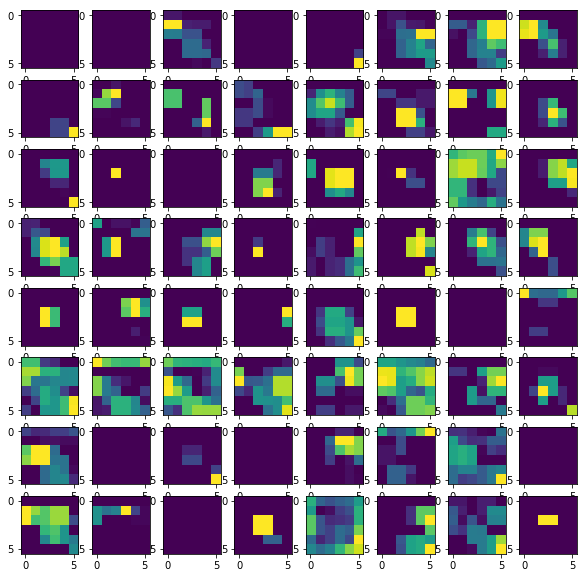

In [145]:
# View AlexNet features 
plt.figure(figsize=(10,10))
for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.imshow(img[0].detach().numpy()[i])

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

### Since the bulk of feature extraction has already been done via AlexNet, I only include two fully-connected layers with very few units to train the classfier.

In [0]:
class AlexCnn(nn.Module):

  def __init__(self):
    super(AlexCnn, self).__init__()
    self.name = "AlexCnn1"
    self.fc1 = nn.Linear(256*6*6, 32)
    self.fc2 = nn.Linear(32, 9)
    self.d1 = nn.Dropout(0)

  def forward(self, x):

    x = x.view(-1, 256*6*6)
    x = F.relu(self.fc1(self.d1(x)))
    x = self.fc2(self.d1(x))

    return x

In [19]:
# Test
alex_model = AlexCnn()
output = alex_model(img)
prob = F.softmax(output)
prob[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([0.0936, 0.1154, 0.0943, 0.1261, 0.1271, 0.0978, 0.1117, 0.1169, 0.1170],
       grad_fn=<SelectBackward>)

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

Training...
Quarter way done - Epoch 7
Train acc 0.7324137931034482 Val acc 0.6122448979591837
Halfway done - Epoch 15
Train acc 0.7882758620689655 Val acc 0.6265306122448979
3/4 done - Epoch 22
Train acc 0.8441379310344828 Val acc 0.6632653061224489
Total time elapsed: 66.41 seconds
Final Training Accuracy: 0.8875862068965518
Final Validation Accuracy: 0.6714285714285714


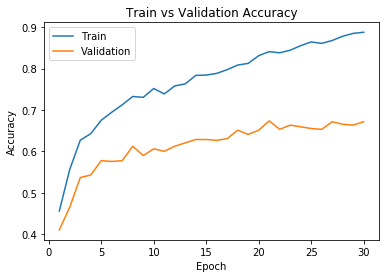

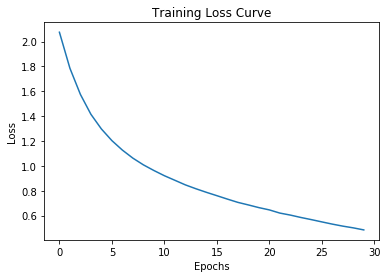

In [43]:
alex_model = AlexCnn()
alex_model.cuda()
train(alex_model, alex_train_data, alex_val_data, batch_size=1, learning_rate=0.00001, num_epochs=30)

Training...
Quarter way done - Epoch 3
Train acc 0.7820689655172414 Val acc 0.5979591836734693
Halfway done - Epoch 7
Train acc 0.9393103448275862 Val acc 0.6571428571428571
3/4 done - Epoch 11
Train acc 0.9896551724137931 Val acc 0.6632653061224489
Total time elapsed: 4.55 seconds
Final Training Accuracy: 0.9951724137931034
Final Validation Accuracy: 0.6530612244897959


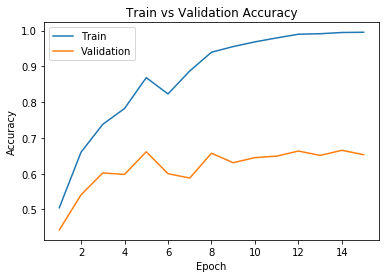

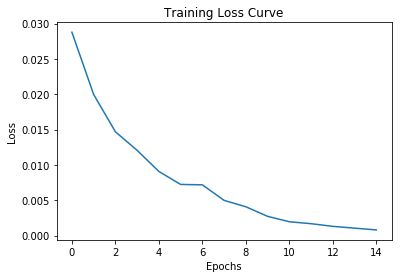

In [39]:
alex_model = AlexCnn()
alex_model.cuda()
train(alex_model, alex_train_data, alex_val_data, batch_size=64, learning_rate=0.01, num_epochs=15)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to part 4(d)?

In [42]:
model = AlexCnn()
checkpoint = torch.load(get_model_name("AlexCnn1", 64, 0.01, 14))
model.load_state_dict(checkpoint)
get_accuracy(alex_model.cuda(), alex_test_data, True)

0.6878850102669405

### The accuracy of AlexNet's CNN came to 68%, whereas my own model came to 70%. This is partially due the overfitting that takes place. AlexNet CNN has a high overfitting rate in each training scenario, so there is a lot of potential in increasing the accuracy higher. I did my best by simplifying the CNN arachitecture, increasing the lr, and increasing batch size to overcome the overfitting.